In [3]:
from pathlib import Path

import matplotlib.pyplot as plt
import tensorflow as tf

from data import example_to_tensor, normalize, add_channel_axis
from config import data_root_dir
from utils import plot_slice, plot_animated_volume

%matplotlib inline
plt.rcParams["figure.figsize"] = [15, 7]

In [13]:
def filter_scan(scan, min_value, max_value):
    scan = tf.where((scan >= min_value) & (scan <= max_value), scan, 0)
    scan = tf.where(scan == 0, scan, 1)
    return scan


assert all(filter_scan(tf.constant([1, 2, 3, 4, 5, 6, 7, 8, 9, 10]), 3, 6) == tf.constant(
    [0, 0, 1, 1, 1, 1, 0, 0, 0, 0]
))

In [33]:
neg_tfrecord_fnames = [str(p) for p in Path(data_root_dir).glob("CT-3/*.tfrecord")]
neg_x = (
    tf.data.TFRecordDataset(neg_tfrecord_fnames).map(
        example_to_tensor, num_parallel_calls=tf.data.experimental.AUTOTUNE
    )
    .map(normalize, num_parallel_calls=tf.data.experimental.AUTOTUNE)
    #.map(lambda x: filter_scan(x, -700, -600), num_parallel_calls=tf.data.experimental.AUTOTUNE)
    .map(add_channel_axis, num_parallel_calls=tf.data.experimental.AUTOTUNE)
)
neg_x

<ParallelMapDataset shapes: (None, None, None, 1), types: tf.float32>

In [34]:
i = next(iter(neg_x))
i.shape

TensorShape([48, 512, 512, 1])

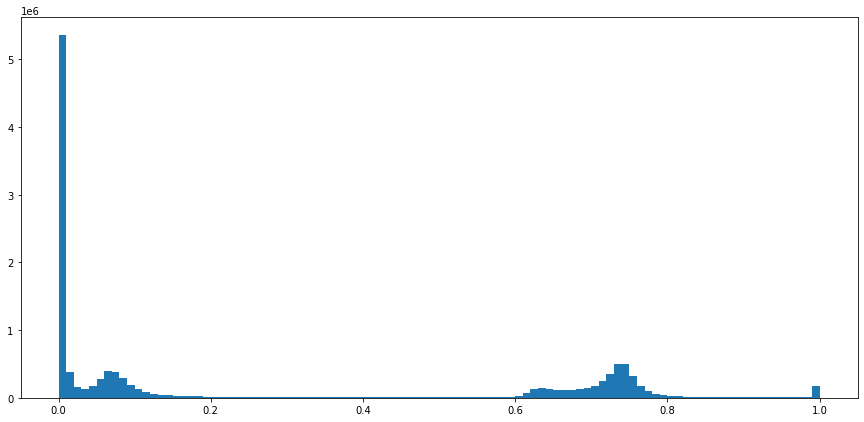

In [35]:
plt.hist(i.numpy().flatten(), bins=100);

In [37]:
plot_animated_volume(i)

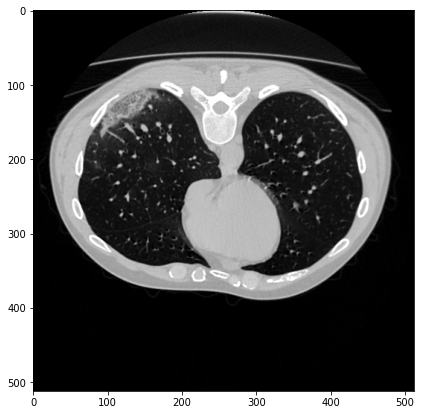

In [40]:
plot_slice(i, z_index=15)